# Contest from: https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/. 

## Load Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('./train.csv')

In [3]:
print(df.head(10))
print(df.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [4]:
# Display missing data
print(df.apply(lambda x: sum(x.isnull()),axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Checking data types of columns
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
#Displaying possible answers for all missing categories
print("Gender:")
print(df['Gender'].value_counts(ascending=True))

print("\nMarried:")
print(df['Married'].value_counts(ascending=True))

print('\nDependents:')
print(df['Dependents'].value_counts(ascending=True))

print("\nSelf Employed:")
print(df['Self_Employed'].value_counts(ascending=True))

print("\nLoan Amount:")
print(df['LoanAmount'].value_counts(ascending=True))

print("\nLoan Amount Term:")
print(df['Loan_Amount_Term'].value_counts(ascending=True))

print("\nCredit History:")
print(df['Credit_History'].value_counts(ascending=True))

print("\nProperty Area:")
print(df['Property_Area'].value_counts())

Gender:
Female    112
Male      489
Name: Gender, dtype: int64

Married:
No     213
Yes    398
Name: Married, dtype: int64

Dependents:
3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64

Self Employed:
Yes     82
No     500
Name: Self_Employed, dtype: int64

Loan Amount:
311.0     1
117.0     1
376.0     1
300.0     1
570.0     1
89.0      1
54.0      1
78.0      1
436.0     1
650.0     1
304.0     1
279.0     1
405.0     1
280.0     1
349.0     1
42.0      1
72.0      1
240.0     1
214.0     1
59.0      1
495.0     1
166.0     1
191.0     1
83.0      1
164.0     1
48.0      1
142.0     1
73.0      1
101.0     1
315.0     1
         ..
152.0     5
180.0     6
155.0     6
144.0     6
175.0     6
116.0     6
158.0     6
90.0      6
138.0     6
81.0      6
80.0      6
104.0     7
125.0     7
132.0     7
136.0     7
135.0     7
150.0     7
112.0     8
115.0     8
70.0      8
95.0      9
96.0      9
130.0    10
113.0    11
128.0    11
160.0    12
187.0    12
100.0    15

In [7]:
# Sanitizing Gender
# Converting all NaN genders to Male
df['Gender'] = df['Gender'].fillna('Male')

# Converting Male to 1 and Female to 0
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [8]:
# Sanitizing married
# Default to no
df["Married"] = df["Married"].fillna('No')

# Converting No to 0 and Yes to 1
df["Married"] = df["Married"].map({'No':0, 'Yes':1})

In [9]:
# Sanitizing dependents
# Default to 0 dependents
df["Dependents"] = df["Dependents"].fillna(0)
df["Dependents"] = df["Dependents"].replace({"3+":3})
df["Dependents"] = pd.to_numeric(df["Dependents"])

In [10]:
# Sanitizing Self Employed
# Default self employed to no
df["Self_Employed"] = df["Self_Employed"].fillna("No")

# Converting Yes to 1
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})

In [11]:
# Sanitizing Credit History
# Default credit history to 0
df["Credit_History"] = df["Credit_History"].fillna(0.0)

In [12]:
# Sanitize loan amount.
# Setting NaN vals to mean.
# All values are whole numbers
df["LoanAmount"] = df["LoanAmount"].fillna(np.floor(df["LoanAmount"].mean()))

In [13]:
# Sanitize loan term
# Setting NaN vals to mean
# All loan terms are whole numbers
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(np.floor(df["Loan_Amount_Term"].mean()))

In [14]:
# Converting property area
# Urban = 0
# Semiurban = 1
# Rural = 2
df["Property_Area"] = df["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":2})

In [15]:
# Converting Education
df["Education"] = df["Education"].map({"Graduate":1, "Not Graduate":0})

In [16]:
# Converting loan status
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

In [17]:
# Display missing data
# Should all be filled
print(df.apply(lambda x: sum(x.isnull()),axis=0))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Gender  Loan_Status
0       0               37
        1               75
1       0              155
        1              347
dtype: int64


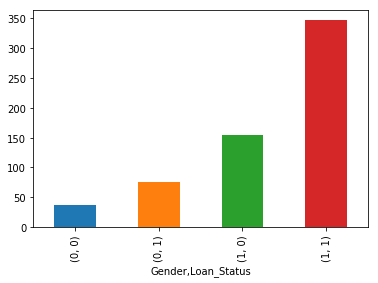

Approval ratings for males:
69.12350597609563
Approval ratings for females:
66.96428571428571


In [18]:
# Checking Relationship between gender and loan approval
result = df.groupby(["Gender","Loan_Status"]).size()
print(result)
df.groupby(["Gender","Loan_Status"]).size().plot.bar()
plt.show()

print("Approval ratings for males:")
print(result[1][1]/float(result[1][1]+result[1][0])*100)
print("Approval ratings for females:")
print(result[0][1]/float(result[0][1]+result[0][0])*100)

# Gender seems to not affect approval ratings

In [19]:
# Checking if marital status affects approval ratings
result = df.groupby(["Married","Loan_Status"]).size()
print(result)

print("Approval ratings for Married:")
print(result[1][1]/float(result[1][1]+result[1][0])*100)
print("Approval ratings for Single:")
print(result[0][1]/float(result[0][1]+result[0][0])*100)

# Marital status seems have to an affect

Married  Loan_Status
0        0               79
         1              137
1        0              113
         1              285
dtype: int64
Approval ratings for Married:
71.60804020100502
Approval ratings for Single:
63.42592592592593


In [20]:
# Checking if education impacts approval
result = df.groupby(["Education", "Loan_Status"]).size()
print(result)

print("Approval for non graduates:")
print(result[0][1]/float(result[0][1]+result[0][0])*100)
print("Approval for graduates:")
print(result[1][1]/float(result[1][1]+result[1][0])*100)

Education  Loan_Status
0          0               52
           1               82
1          0              140
           1              340
dtype: int64
Approval for non graduates:
61.19402985074627
Approval for graduates:
70.83333333333334


In [21]:
# Checking if number of dependents impact rating
result = df.groupby(["Dependents","Loan_Status"]).size()
print(result)

print("Approval ratings for 0 dependents:")
print(result[0][1]/float(result[0][1]+result[0][0])*100)
print("Approval ratings for 1 dependent:")
print(result[1][1]/float(result[1][1]+result[1][0])*100)
print("Approval ratings for 2 dependent:")
print(result[2][1]/float(result[2][1]+result[2][0])*100)
print("Approval ratings for 3+ dependent:")
print(result[3][1]/float(result[3][1]+result[3][0])*100)

Dependents  Loan_Status
0           0              113
            1              247
1           0               36
            1               66
2           0               25
            1               76
3           0               18
            1               33
dtype: int64
Approval ratings for 0 dependents:
68.61111111111111
Approval ratings for 1 dependent:
64.70588235294117
Approval ratings for 2 dependent:
75.24752475247524
Approval ratings for 3+ dependent:
64.70588235294117


In [22]:
# Dropping unused columns
df = df.drop(["Loan_ID", "Gender", "Dependents","Property_Area"], axis=1)

In [23]:
# Randomly shuffling data set and using 500 of the 614 datapoints as a training set
data_array = df.values
np.random.shuffle(data_array)
X_learning = data_array[:500][:,0:8]
Y_learning = data_array[:500][:,8]

In [24]:
# Training SVC model
svc = SVC()
svc.fit(X_learning, Y_learning)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# Running on training set
predictions = svc.predict(X_learning)
print("Accuracy: %f" %(accuracy_score(Y_learning, predictions)))

Accuracy: 1.000000


In [26]:
# Evaluating results
X_test = data_array[-114:][:,0:8]
Y_test = data_array[-114:][:,8]

predictions = svc.predict(X_test)
print("Predicted results: ")
print(predictions)
print("Actual results: ")
print(Y_test)
print("Accuracy: %f" %(accuracy_score(Y_test, predictions)))

Predicted results: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual results: 
[1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]
Accuracy: 0.684211


In [27]:
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[ 0 36]
 [ 0 78]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        36
        1.0       0.68      1.00      0.81        78

avg / total       0.47      0.68      0.56       114



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# K fold validation
data_array = df.values
np.random.shuffle(data_array)
X_learning = data_array[:500][:,0:8]
Y_leanring = data_array[:500][:,8]

# Splitting into 10 folds
kfold = model_selection.KFold(n_splits=10)

In [29]:
models = []
models.append(( "LoR", LogisticRegression() ))
models.append(( "LDA", LinearDiscriminantAnalysis() ))
models.append(( "QDA", QuadraticDiscriminantAnalysis() ))
models.append(( "SVC", SVC() ))
models.append(( "LSVC", LinearSVC() ))
models.append(( "SGD", SGDClassifier() ))
models.append(( "KNN", KNeighborsClassifier() ))
models.append(( "GNB", GaussianNB() ))
models.append(( "DT", DecisionTreeClassifier() ))
models.append(( "RF", RandomForestClassifier() ))

In [30]:
# cross validating models
model_names = []
means = []
stds =[]
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_learning, Y_learning, scoring="accuracy", cv=kfold)
    print("\n" + name)
    model_names.append(name)
    print("Result: " + str(cv_results))
    print("Mean: " + str(cv_results.mean()))
    print("Standard Deviation: " + str(cv_results.std()))
    means.append(cv_results.mean())
    stds.append(cv_results.std())


LoR
Result: [0.62 0.7  0.64 0.66 0.74 0.76 0.68 0.72 0.6  0.74]
Mean: 0.6859999999999999
Standard Deviation: 0.05219195340279955

LDA
Result: [0.62 0.7  0.64 0.66 0.74 0.76 0.68 0.72 0.6  0.74]
Mean: 0.6859999999999999
Standard Deviation: 0.05219195340279955

QDA
Result: [0.54 0.6  0.62 0.62 0.62 0.74 0.58 0.72 0.58 0.7 ]
Mean: 0.6319999999999999
Standard Deviation: 0.06273754856543248

SVC
Result: [0.6  0.7  0.64 0.66 0.74 0.76 0.68 0.72 0.6  0.76]
Mean: 0.6859999999999999
Standard Deviation: 0.05730619512757761

LSVC
Result: [0.6  0.72 0.54 0.34 0.72 0.76 0.68 0.72 0.6  0.74]
Mean: 0.642
Standard Deviation: 0.1218031198286809

SGD
Result: [0.62 0.28 0.54 0.66 0.58 0.76 0.44 0.28 0.4  0.68]
Mean: 0.524
Standard Deviation: 0.15894653189044422

KNN
Result: [0.56 0.72 0.6  0.6  0.7  0.64 0.6  0.64 0.64 0.62]
Mean: 0.632
Standard Deviation: 0.045782092569038375

GNB
Result: [0.56 0.64 0.64 0.64 0.62 0.78 0.6  0.68 0.58 0.7 ]
Mean: 0.644
Standard Deviation: 0.06053098380168623

DT
Result:

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

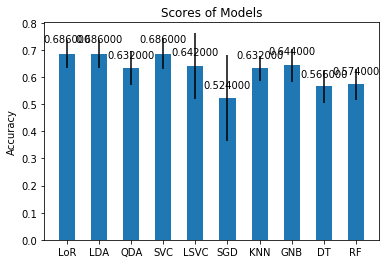

In [31]:
# plotting results
x_loc = np.arange(len(models))
width = 0.5
models_graph = plt.bar(x_loc, means, width, yerr=stds)
plt.ylabel("Accuracy")
plt.title("Scores of Models")
plt.xticks(x_loc, model_names)

def addLabels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % height, ha='center',
                va='bottom')
        
addLabels(models_graph)
plt.show()